In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gender-classification/Transformed Data Set - Sheet1.csv


# Gender Classification
## Classifying gender based on personal preferences

About Dataset
Context
Gender is a social construct. The way males and females are treated differently since birth moulds their behaviour and personal preferences into what society expects for their gender.

This small dataset is designed to provide an idea about whether a person's gender can be predicted with an accuracy significantly above 50% based on their personal preferences.

Content
The data was collected in Fall 2015 from university students of 21 nationalities studying various majors in various countries using this form:

https://docs.google.com/forms/d/e/1FAIpQLSduEjDURjTh7-a1ZjjlIYx75ScVETLp_gmoFszypz2J7E0LtQ/viewform

The responses were then pre-processed and grouped into categories in order to obtain the final, transformed dataset.

Inspiration
With the rise of feminism, the difference between males and females in terms of their personal preferences has decreased in recent years. For instance, historically in many cultures, warm colors such as red and pink were thought of as feminine colors while cool colors such as blue were considered masculine. Today, such ideas are considered outdated.

Despite the decrease in the influence of gender on people’s personal preferences, can a decent gender classifier be built given a dataset with people’s personal preferences? What does this small dataset suggest?

In [2]:
df=pd.read_csv('/kaggle/input/gender-classification/Transformed Data Set - Sheet1.csv')
df.head()#to show the first 5 rows

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


In [3]:
df.describe()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
count,66,66,66,66,66
unique,3,7,6,4,2
top,Cool,Rock,Doesn't drink,Coca Cola/Pepsi,F
freq,37,19,14,32,33


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        66 non-null     object
 1   Favorite Music Genre  66 non-null     object
 2   Favorite Beverage     66 non-null     object
 3   Favorite Soft Drink   66 non-null     object
 4   Gender                66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


In [5]:
df.columns  #to show all columns

Index(['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage',
       'Favorite Soft Drink', 'Gender'],
      dtype='object')

In [6]:
df.Gender.value_counts()

Gender
F    33
M    33
Name: count, dtype: int64

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

<Axes: xlabel='Gender', ylabel='count'>

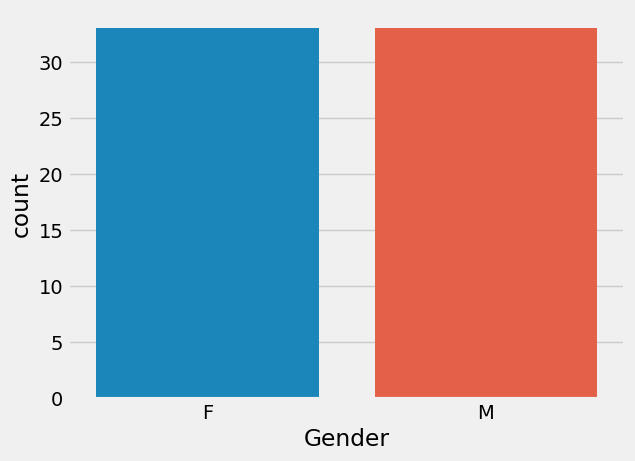

In [8]:
sns.countplot(x='Gender',data=df)

<Axes: xlabel='Gender', ylabel='count'>

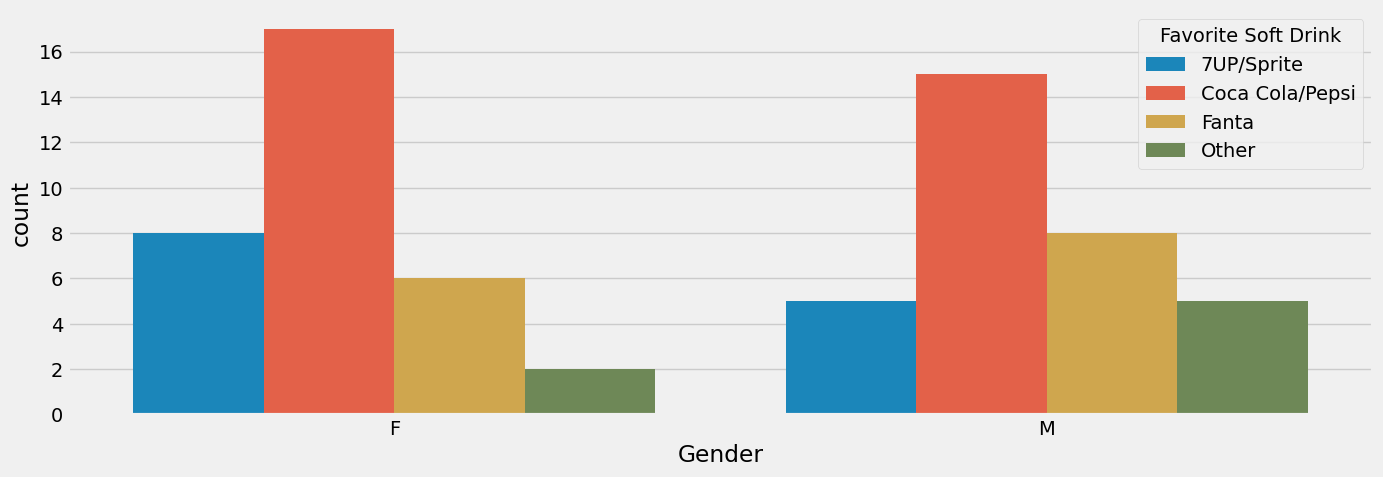

In [9]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='Gender',hue='Favorite Soft Drink')

In [10]:
df.columns

Index(['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage',
       'Favorite Soft Drink', 'Gender'],
      dtype='object')

In [11]:
from sklearn.preprocessing import LabelEncoder
df['Favorite Music Genre'].unique()
fav_music=df.copy()
L_encoder=LabelEncoder()
fav_music['Favorite Music Genre']=L_encoder.fit_transform(fav_music['Favorite Music Genre'])
fav_music.head(2)

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,6,Vodka,7UP/Sprite,F
1,Neutral,2,Vodka,Coca Cola/Pepsi,F


# Label encoder
efficient tool for encoding the levels of categorical features into numeric values. LabelEncoder encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels. If a label repeats it assigns the same value to as assigned earlier

In [12]:

df.head(2)

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F


In [13]:
cols=list(df.columns)
for col in cols:
    df[col]=L_encoder.fit_transform(df[col])
df  

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,0,6,3,0,0
1,1,2,3,1,0
2,2,6,5,1,0
3,2,1,4,2,0
4,0,6,3,1,0
...,...,...,...,...,...
61,0,6,3,1,1
62,0,2,0,1,1
63,1,2,1,2,1
64,0,6,5,1,1


<Axes: >

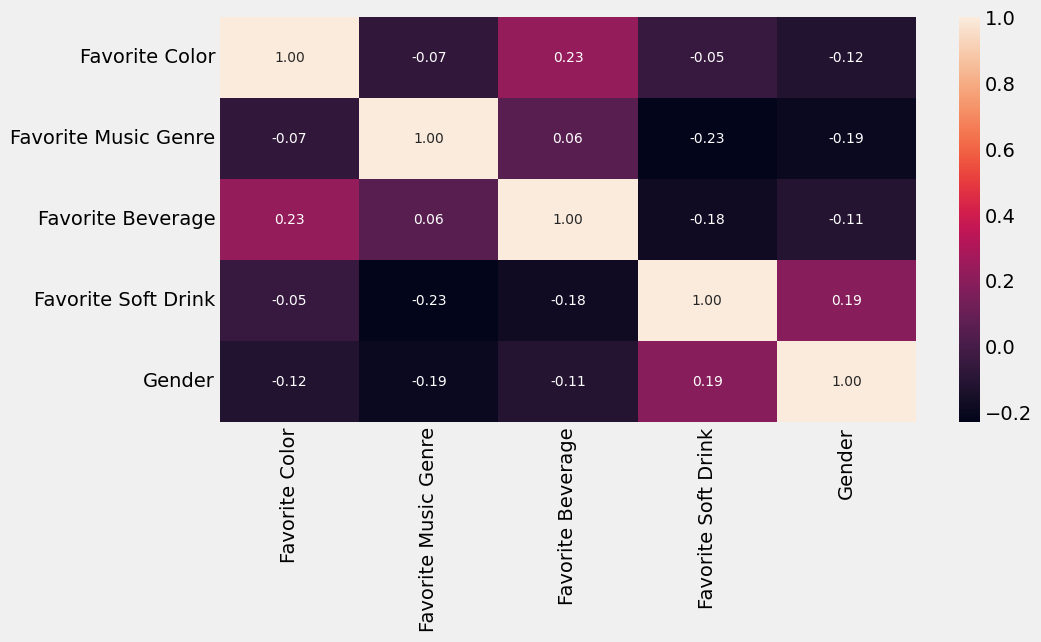

In [14]:
col_correlation = df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(col_correlation,annot=True,fmt='.2f',annot_kws={'size': 10})

In [15]:
x=df.drop('Gender',axis=1)
y=df['Gender']

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10,shuffle=True)

# Building KNN model

In [17]:
from sklearn.neighbors import KNeighborsClassifier
KN_model=KNeighborsClassifier(n_neighbors=4)
KN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [18]:
KN_predicting=KN_model.predict(X_test)

<Axes: >

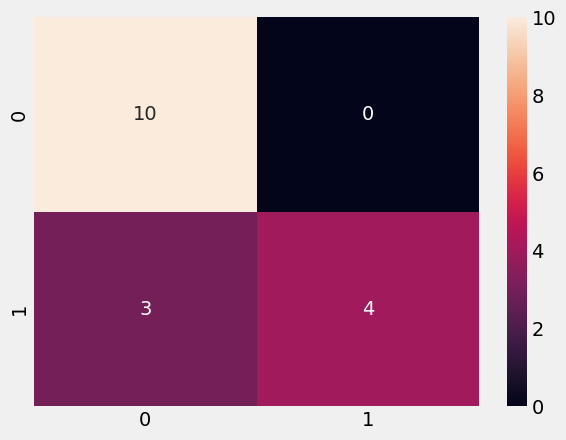

In [19]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,KN_predicting)
sns.heatmap(cm,annot=True)

# predicting to first 10 values

In [20]:
print("y true :",y_test[:10].values)
print("y predict :",KN_predicting[:10])

y true : [0 0 1 0 0 1 0 0 1 0]
y predict : [0 0 1 0 0 0 0 0 1 0]


In [21]:
print(classification_report(y_test,KN_predicting))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.57      0.73         7

    accuracy                           0.82        17
   macro avg       0.88      0.79      0.80        17
weighted avg       0.86      0.82      0.81        17



In [22]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

def model_scores(model, y_predicted):
    # Accuracy
    acc_train = model.score(X_train, y_train)*100
    acc_test = model.score(X_test, y_test)*100
    
    roc = roc_auc_score(y_test, y_predicted)*100 
    tn, fp, fn, tp = confusion_matrix(y_test, y_predicted).ravel()
    cm = confusion_matrix(y_test, y_predicted)
    correct = tp + tn
    incorrect = fp + fn
    
    return acc_train, acc_test, roc, correct, incorrect, cm

In [24]:
#1. Logistic regression

from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

Y_pred_lr = model_lr.predict(X_test)
print(model_scores(model_lr, Y_pred_lr))

(65.3061224489796, 47.05882352941176, 48.57142857142856, 8, 9, array([[4, 6],
       [3, 4]]))


In [25]:
#2. KNN

from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train)

Y_pred_knn = model_knn.predict(X_test)
print(model_scores(model_knn, Y_pred_knn))

(69.38775510204081, 76.47058823529412, 75.71428571428572, 13, 4, array([[8, 2],
       [2, 5]]))


<Axes: >

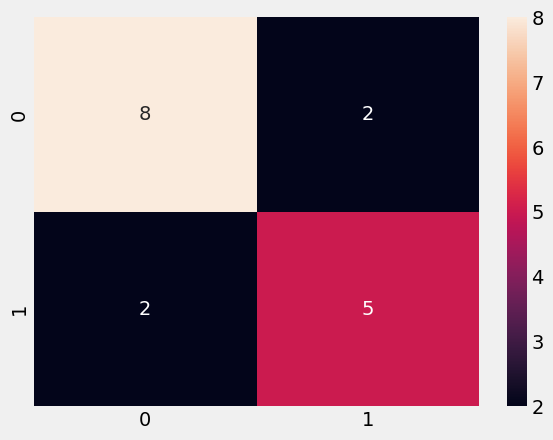

In [26]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,Y_pred_knn)
sns.heatmap(cm,annot=True)

In [27]:
#3. Naive Bayes

from sklearn.naive_bayes import GaussianNB
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)

Y_pred_gnb = model_gnb.predict(X_test)
print(model_scores(model_gnb, Y_pred_gnb))

(67.3469387755102, 52.94117647058824, 53.57142857142857, 9, 8, array([[5, 5],
       [3, 4]]))


<Axes: >

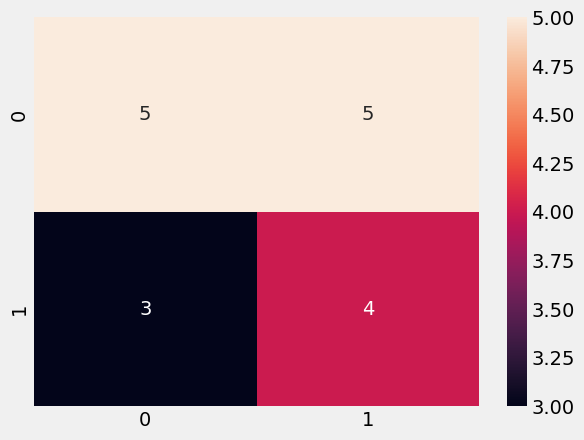

In [28]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,Y_pred_gnb)
sns.heatmap(cm,annot=True)

In [29]:
#4. SVM 
from sklearn.svm import SVC

model_svm = SVC()
model_svm.fit(X_train, y_train)

Y_pred_svm = model_svm.predict(X_test)
print(model_scores(model_svm, Y_pred_svm))

(71.42857142857143, 70.58823529411765, 70.71428571428571, 12, 5, array([[7, 3],
       [2, 5]]))


In [30]:
#5. Decision tree
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(random_state=0)
model_dt.fit(X_train, y_train)
model_dt.fit(X_train, y_train)

Y_pred_dt = model_dt.predict(X_test)
print(model_scores(model_dt, Y_pred_dt))

(93.87755102040816, 64.70588235294117, 70.0, 11, 6, array([[4, 6],
       [0, 7]]))


In [31]:
#6. Radom forest classifier

from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(max_depth=10, random_state=42)
model_rfc.fit(X_train, y_train)

Y_pred_rfc = model_rfc.predict(X_test)
print(model_scores(model_rfc, Y_pred_rfc))

(93.87755102040816, 64.70588235294117, 65.71428571428572, 11, 6, array([[6, 4],
       [2, 5]]))


In [32]:
#7. Gradient boosting classifier

from sklearn.ensemble import GradientBoostingClassifier

model_gbc = GradientBoostingClassifier(random_state=42)
model_gbc.fit(X_train, y_train)

Y_pred_gbc = model_gbc.predict(X_test)
print(model_scores(model_gbc, Y_pred_gbc))

(93.87755102040816, 76.47058823529412, 80.0, 13, 4, array([[6, 4],
       [0, 7]]))


<Axes: >

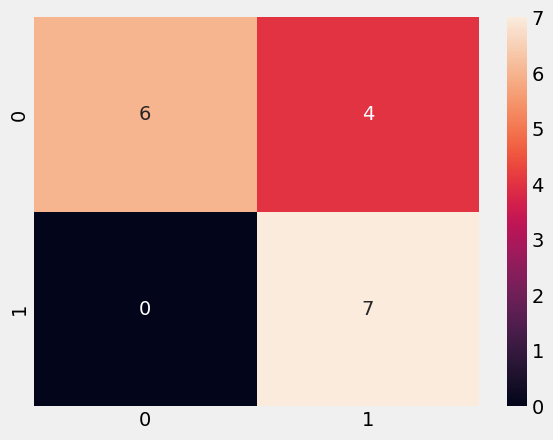

In [33]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,Y_pred_gbc)
sns.heatmap(cm,annot=True)